In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib as mpl
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import sem
%matplotlib inline

In [2]:
data1 = pd.read_csv('data/pfak gh2ax loci count.csv')

## Data 1

In [3]:
data1.head()

,Slice,Count,Total Area,Average Size,%Area,Mean,IntDen,tto,data
0,controle 1 - dapi - pfak - gamma - 1_Out-1.czi...,2,2.294,1.147,0.562,255.0,292.522,ct,2020_06_09
1,controle 1 - dapi - pfak - gamma - 2_Out-1.czi...,29,8.267,0.285,0.959,255.0,72.688,ct,2020_06_10
2,controle 1 - dapi - pfak - gamma - 3_Out-1.czi...,24,5.385,0.224,1.071,255.0,57.214,ct,2020_06_11
3,controle 2 - dapi - pfak - gamma - 1_Out-1.czi...,3,0.782,0.261,0.209,255.0,66.448,ct,2020_06_12
4,controle 2 - dapi - pfak - gamma - 2_Out-1.czi...,9,3.921,0.436,1.120,255.0,111.100,ct,2020_06_13


In [4]:
filt_ct = (data1['tto'] == 'ct')
filt_dox = (data1['tto'] == 'dox')

ct_mean = data1.loc[filt_ct, 'Count'].mean()
dox_mean = data1.loc[filt_dox, 'Count'].mean()

ct_sem = data1.loc[filt_ct, 'Count'].sem()
dox_sem = data1.loc[filt_dox, 'Count'].sem()

ct_std = data1.loc[filt_ct, 'Count'].std()
dox_std = data1.loc[filt_dox, 'Count'].std()

ct_list = data1.loc[filt_ct, 'Count']
dox_list = data1.loc[filt_dox, 'Count']

[7.15625, 64.51351351351352]
t=-11.848, p=0.00000
****


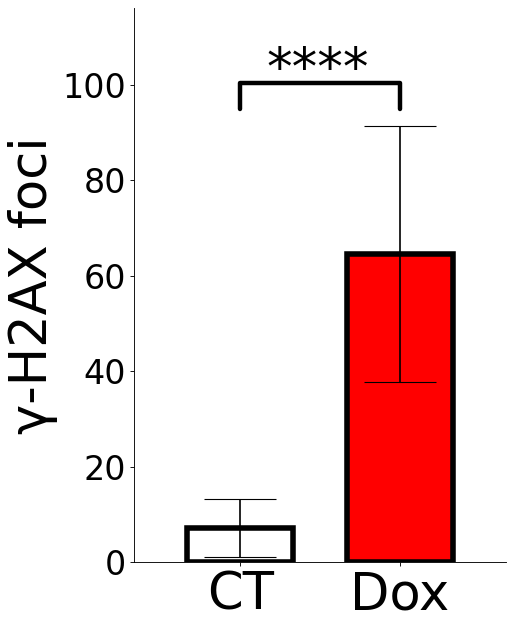

In [5]:
# Dados ######################################### ct dmso x dox dmso (fak)

ttest_group = [ct_list, dox_list]
means = [ct_mean, dox_mean]
erro = [ct_std, dox_std]

cor_ct = 'white'              #cor do grupo controle (barra1)
cor_dox = 'red'              #cor do grupo dox (barra2)

Nome_imagem_pdf = 'pfak gh2ax loci avg red std.pdf' # nome da imagem salva em .pdf
Nome_imagem_jpeg = 'pfak gh2ax loci avg red std.jpeg' # nome da imagem salva em .jpeg

cor_envolta = "black" #cor da linha envolta das barras
espessura_volta = 5   #espessura da linha envolta das barras
tamanho_barra_erro = 30           #tamanho da barra horizontal de erro

# coisas relacionadas ao eixo Y
Eixo_Y = 'γ-H2AX foci' # O que vai aparecer escrito no eixo Y
Tamanho_label_Y = 46 # Tamanho do texto do eixo Y
Tamanho_ticks_Y = 30 # Tamanho dos números que aparecem no eixo Y

# coisas relacionadas ao eixo X
labels = ['CT', 'Dox'] #o que vai aparecer embaixo das barras, no eixo X.
Tamanho_label_X = 46 # Tamanho do texto do eixo X

print(means)

# normalização ######################################### 
# essa parte serve para criar um gráfico que visivelmente fica mais fácil ver quantas vezes ficou maior o grupo tratado (barra 2) do controle (barra 1)
# caso não quiser isso, é só comentar todas essa parte ou apagar

# erro_ct = erro[0]/means[0]
# erro_dox = erro[1]/means[0]
# erro = [erro_ct,erro_dox]

# ct_norm = means[0]/means[0]
# dox_norm = means[1]/means[0]
# means = [ct_norm, dox_norm]

# p #########################################
# essa parte é uma função que pega as datas dos dois grupos e faz um teste estatístico t de studant para ver se é uma variação significativa ou não e quanto significativa.
# aparece em asterístico automaticamente no gráfico

stat, p = ttest_ind(ttest_group[0], ttest_group[1])
print('t=%.3f, p=%.5f' % (stat, p))

def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "NS"

pValue = convert_pvalue_to_asterisks(p)
print(convert_pvalue_to_asterisks(p))

# plotar traço #########################################
# essa parte serve para criar aquela barra encima do das duas barras
# agradecimentos para Sofia que me mostrou isso pela primeira vez e onde achou
# agradecimento ao Bruno que é o melhor programador que conheço e me ajudou.


def traco(text,X,Y):
    x = (X[0]+X[1])/2
    y = 1.4* max(Y[0], Y[1]) #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x-.01 # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':20,'shrinkB':20,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+0.15*max(means)), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################
x = [.045,.075]  # localização da barra
width = 0.02# espessura da barra

fig, ax = plt.subplots(figsize=(6,9), dpi=80)
barra_controle = ax.bar(x[0], means[0] ,yerr=erro[0], capsize =32, width= width, color= cor_ct ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[0])
barra_doxo =  ax.bar(x[1], means[1], yerr=erro[1], capsize =32, width= width ,color= cor_dox ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[1])
traco(pValue,x,means)
rects = ax.patches

# Os números em cima das barras #########################################
# label = ["%.f"%item for item in means] # essa parte de "%.2f"% é para aparecer o numero em float, se trocar pra i, é inteiro
# for rect, label in zip(rects, label):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width() / 2, height+0.01*max(count_above_10_group), label,
#             ha='center', va='bottom', size='46')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(Eixo_Y,fontsize=Tamanho_label_Y)
#ax.set_title('média de FAK no núcleo - 24h doxo',fontsize=16, pad = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=Tamanho_label_X)
# plt.ylim(0, 1.6* max(means))
plt.ylim(0,1.8* max(means))
plt.xlim((x[0]-.02),(x[1])+.02)
#plt.legend(prop={"size":15},loc="upper left")
plt.yticks(fontsize=Tamanho_ticks_Y)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(Nome_imagem_pdf,bbox_inches='tight') # a parte do bbox_inches='tight' é que faz o tamanho ficar correto
plt.savefig(Nome_imagem_jpeg,bbox_inches='tight')

plt.show()

[7.15625, 64.51351351351352]
t=-11.848, p=0.00000
****


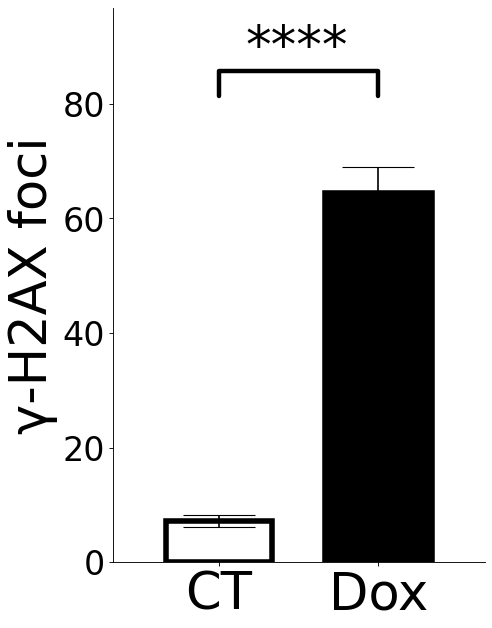

In [6]:
# Dados ######################################### ct dmso x dox dmso (fak)

ttest_group = [ct_list, dox_list]
means = [ct_mean, dox_mean]
erro = [ct_sem, dox_sem]

cor_ct = 'white'              #cor do grupo controle (barra1)
cor_dox = 'black'              #cor do grupo dox (barra2)

Nome_imagem_pdf = 'pfak gh2ax loci avg black sem.pdf' # nome da imagem salva em .pdf
Nome_imagem_jpeg = 'pfak gh2ax loci avg black sem.jpeg' # nome da imagem salva em .jpeg

cor_envolta = "black" #cor da linha envolta das barras
espessura_volta = 5   #espessura da linha envolta das barras
tamanho_barra_erro = 30           #tamanho da barra horizontal de erro

# coisas relacionadas ao eixo Y
Eixo_Y = 'γ-H2AX foci' # O que vai aparecer escrito no eixo Y
Tamanho_label_Y = 46 # Tamanho do texto do eixo Y
Tamanho_ticks_Y = 30 # Tamanho dos números que aparecem no eixo Y

# coisas relacionadas ao eixo X
labels = ['CT', 'Dox'] #o que vai aparecer embaixo das barras, no eixo X.
Tamanho_label_X = 46 # Tamanho do texto do eixo X

print(means)

# normalização ######################################### 
# essa parte serve para criar um gráfico que visivelmente fica mais fácil ver quantas vezes ficou maior o grupo tratado (barra 2) do controle (barra 1)
# caso não quiser isso, é só comentar todas essa parte ou apagar

# erro_ct = erro[0]/means[0]
# erro_dox = erro[1]/means[0]
# erro = [erro_ct,erro_dox]

# ct_norm = means[0]/means[0]
# dox_norm = means[1]/means[0]
# means = [ct_norm, dox_norm]

# p #########################################
# essa parte é uma função que pega as datas dos dois grupos e faz um teste estatístico t de studant para ver se é uma variação significativa ou não e quanto significativa.
# aparece em asterístico automaticamente no gráfico

stat, p = ttest_ind(ttest_group[0], ttest_group[1])
print('t=%.3f, p=%.5f' % (stat, p))

def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "NS"

pValue = convert_pvalue_to_asterisks(p)
print(convert_pvalue_to_asterisks(p))

# plotar traço #########################################
# essa parte serve para criar aquela barra encima do das duas barras
# agradecimentos para Sofia que me mostrou isso pela primeira vez e onde achou
# agradecimento ao Bruno que é o melhor programador que conheço e me ajudou.


def traco(text,X,Y):
    x = (X[0]+X[1])/2
    y = 1.2* max(Y[0], Y[1]) #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x-.01 # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':20,'shrinkB':20,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+0.15*max(means)), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################
x = [.045,.075]  # localização da barra
width = 0.02# espessura da barra

fig, ax = plt.subplots(figsize=(6,9), dpi=80)
barra_controle = ax.bar(x[0], means[0] ,yerr=erro[0], capsize =32, width= width, color= cor_ct ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[0])
barra_doxo =  ax.bar(x[1], means[1], yerr=erro[1], capsize =32, width= width ,color= cor_dox ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[1])
traco(pValue,x,means)
rects = ax.patches

# Os números em cima das barras #########################################
# label = ["%.f"%item for item in means] # essa parte de "%.2f"% é para aparecer o numero em float, se trocar pra i, é inteiro
# for rect, label in zip(rects, label):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width() / 2, height+0.01*max(count_above_10_group), label,
#             ha='center', va='bottom', size='46')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(Eixo_Y,fontsize=Tamanho_label_Y)
#ax.set_title('média de FAK no núcleo - 24h doxo',fontsize=16, pad = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=Tamanho_label_X)
# plt.ylim(0, 1.6* max(means))
plt.ylim(0,1.5* max(means))
plt.xlim((x[0]-.02),(x[1])+.02)
#plt.legend(prop={"size":15},loc="upper left")
plt.yticks(fontsize=Tamanho_ticks_Y)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(Nome_imagem_pdf,bbox_inches='tight') # a parte do bbox_inches='tight' é que faz o tamanho ficar correto
plt.savefig(Nome_imagem_jpeg,bbox_inches='tight')

plt.show()